In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv('BitcoinHeistData4.csv')
df.dropna(inplace=True)

In [7]:
# Define the features and target variable
X = df[['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income']]
y = df['label']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define and train the 4 models
models = [
    ('LR', LogisticRegression()),
    ('DTC', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('RF', RandomForestClassifier())
]

accuracies = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'{name} Accuracy: {accuracy}')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy: 0.9554804853343678
DTC Accuracy: 0.9922523221482296


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.9675545785651172
RF Accuracy: 0.995280274132023


In [10]:
# Display the accuracies in a table
df_accuracies = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
df_accuracies

,Model,Accuracy
0,"(LR, LogisticRegression())",0.955480
1,"(DTC, DecisionTreeClassifier())",0.992252
2,"(KNN, KNeighborsClassifier())",0.967555
3,"(RF, (DecisionTreeClassifier(max_features='aut...",0.995280


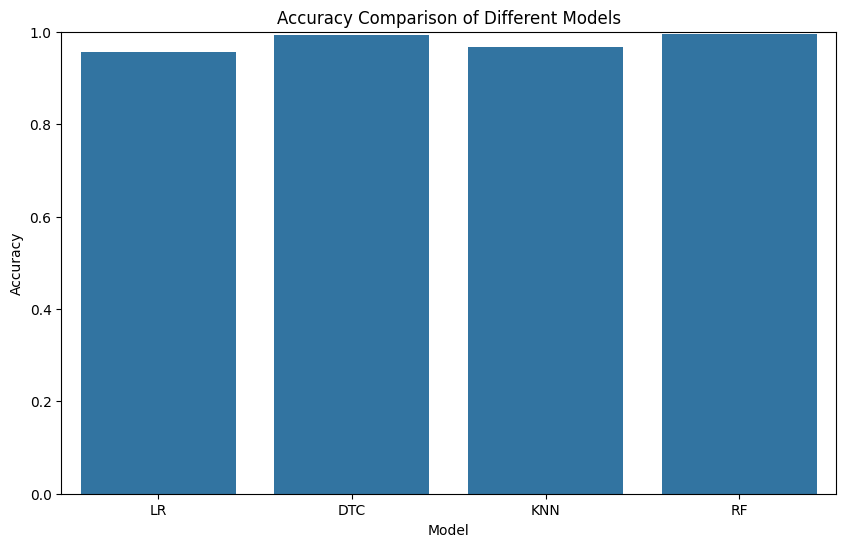

In [11]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=[name for name, _ in models], y=accuracies)
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
